# Band structure calculations

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from quant_met import geometry, mean_field, parameters, plotting

In [ ]:
mpl.style.use("default")

graphene_lattice = geometry.GrapheneLattice(lattice_constant=np.sqrt(3))
n = 1000  # number of points across the whole k space path
t_gr = 1
t_x = 0.01
band_path, band_path_plot, ticks, labels = graphene_lattice.generate_high_symmetry_path(
    number_of_points=n
)

In [ ]:
V_list = [0, 0.5, 1.4, 3]

fig, axs = plt.subplots(nrows=1, ncols=len(V_list), figsize=(len(V_list) * 10, 10))

for V, ax in zip(V_list, axs, strict=False):
    egx_h = mean_field.hamiltonians.DressedGraphene(
        parameters.hamiltonians.DressedGrapheneParameters(
            hopping_gr=t_gr,
            hopping_x=t_x,
            hopping_x_gr_a=V,
            lattice_constant=graphene_lattice.lattice_constant,
            chemical_potential=0,
            hubbard_int_orbital_basis=[0.0, 0.0, 0.0],
        )
    )

    band_structure = egx_h.calculate_bandstructure(
        band_path, overlaps=np.array([[0, 0, 1], [1, 0, 0]])
    )

    bands = band_structure[["band_0", "band_1", "band_2"]]
    overlaps = band_structure[["wx_0", "wx_1", "wx_2"]]

    plotting.plot_bandstructure(
        bands=bands.to_numpy().T,
        overlaps=overlaps.to_numpy().T,
        k_point_list=band_path_plot,
        ticks=ticks,
        labels=labels,
        ax_in=ax,
        fig_in=fig,
        overlap_labels=[r"$w_{\mathrm{Gr}_1}$", r"$w_X$"],
    )

    ax.set_title(f"V = {V:.2f}", fontsize=30)
    ax.tick_params(axis="x", labelsize=20)

fig.savefig("EG-X bands.pdf", bbox_inches="tight")

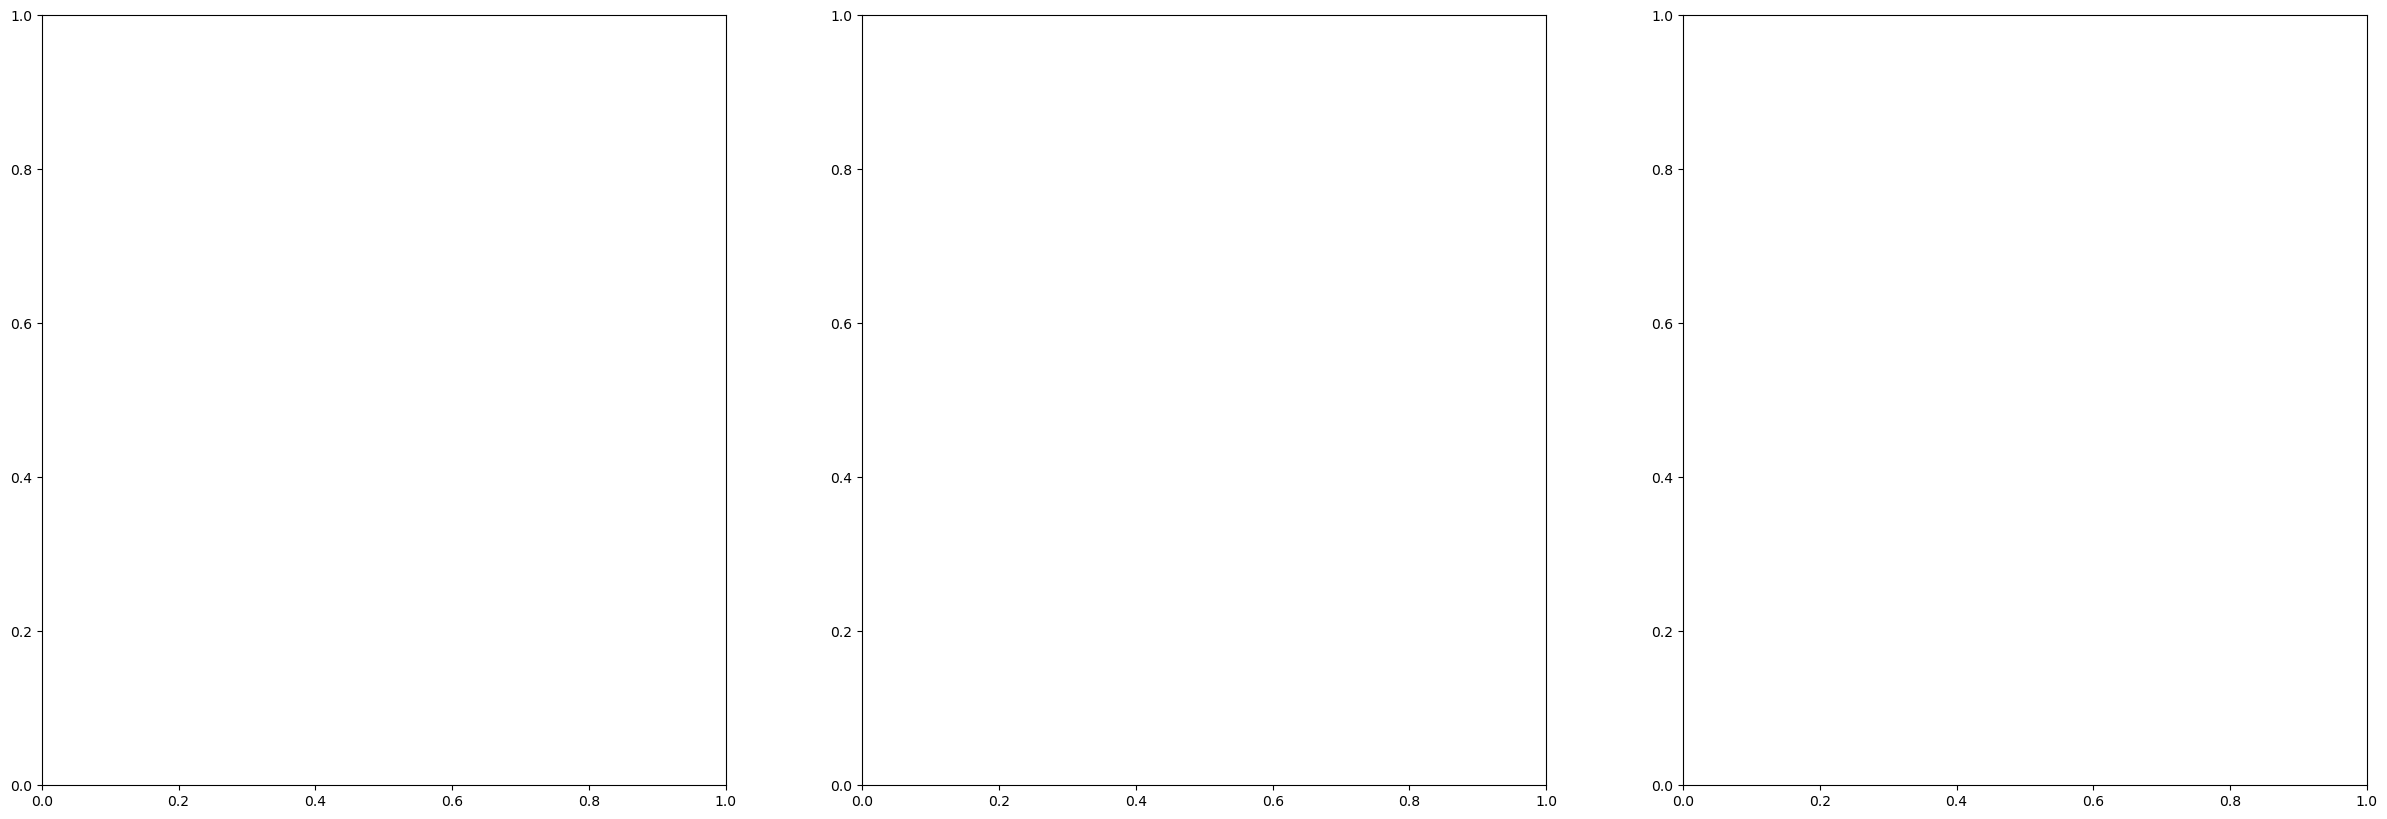

In [4]:
import matplotlib as mpl

mpl.style.use("default")

V_list = [0.01, 0.5, 2]

fig, axs = plt.subplots(nrows=1, ncols=len(V_list), figsize=(len(V_list) * 10, 10))

egx_h = mean_field.hamiltonians.OneBand(
    parameters.hamiltonians.OneBandParameters(
        hopping=t_gr,
        lattice_constant=graphene_lattice.lattice_constant,
        chemical_potential=0,
        hubbard_int_orbital_basis=[0.0],
    )
)

band_structure = egx_h.calculate_bandstructure(band_path, overlaps=np.array([[0, 0, 1], [1, 0, 0]]))